In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import FinalMLutils as ml

In [2]:
#Read data
x_train = np.load('pb1/x_train.npy')
print(np.shape(x_train))
# (60000, 784)
#x_test = np.load('pb1/x_test.npy')
#print(np.shape(x_test))
# (10000, 784)
#x_train_noisy = np.load('pb1/x_train_noisy_dontuse.npy')
#print(np.shape(x_train_noisy))
# (60000, 784)
x_test_noisy = np.load('pb1/x_test_noisy.npy')
print(np.shape(x_test_noisy))
# (10000, 784)
y_train = np.load('pb1/y_train.npy')
print(np.shape(y_train))
# (60000,)
y_test = np.load('pb1/y_test.npy')
print(np.shape(y_test))
# (10000,)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


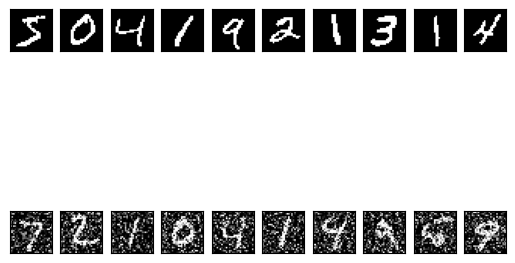

In [3]:
# Plot figures
n = 10
for i in range(n):
    i = i + 1
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_train[i - 1].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy
    ax = plt.subplot(2, n, i + n)
    plt.imshow(x_test_noisy[i - 1].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Problem 1

## A)

### Train Multinomial Regression

In [4]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)

/Users/garrinshieh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# Predict
y_pred = clf.predict(x_test_noisy)

In [6]:
# Accuracy
accuracy_score(y_test, y_pred)

0.2999

## B)

### Correct the noisy images

In [30]:
# add random Gaussian noise to x_train
x_train_noisy = x_train + np.random.normal(0, 1.0, x_train.shape)

# enforce values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

I used a Gaussian noise with mean 0 and standard deviation 1.0. I chose this noise because it is a common noise that is used in image processing. I also tried a uniform noise, but it did not perform as well.

In addition, I tried a Gaussian and Median filter but both had insufficient accuracy.

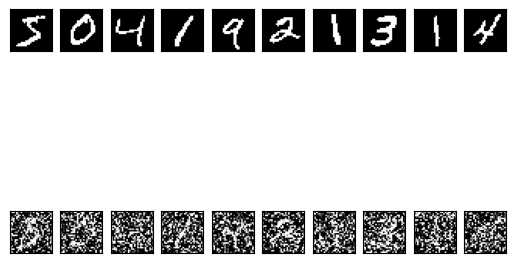

In [31]:
# Plot figures
n = 10
for i in range(n):
    i = i + 1
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_train[i - 1].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy
    ax = plt.subplot(2, n, i + n)
    plt.imshow(x_train_noisy[i - 1].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [32]:
# create autoencoder
autoencoder = ml.AutoencoderTF(hidden_dim=64, encoding_dim=x_train.shape[1])

# train autoencoder
autoencoder.train(x_train_noisy, x_train, epochs=15)

x_test_denoised = autoencoder.predict(x_test_noisy)

Epoch 1/15
1875/1875 [==============================] - 1s 694us/step - loss: 0.0629
Epoch 2/15
1875/1875 [==============================] - 1s 758us/step - loss: 0.0509
Epoch 3/15
1875/1875 [==============================] - 2s 817us/step - loss: 0.0491
Epoch 4/15
1875/1875 [==============================] - 2s 822us/step - loss: 0.0485
Epoch 5/15
1875/1875 [==============================] - 2s 889us/step - loss: 0.0481
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0479
Epoch 7/15
1875/1875 [==============================] - 2s 939us/step - loss: 0.0477
Epoch 8/15
1875/1875 [==============================] - 2s 922us/step - loss: 0.0476
Epoch 9/15
1875/1875 [==============================] - 2s 914us/step - loss: 0.0475
Epoch 10/15
1875/1875 [==============================] - 2s 961us/step - loss: 0.0474
Epoch 11/15
1875/1875 [==============================] - 2s 918us/step - loss: 0.0473
Epoch 12/15
1875/1875 [==============================] - 2s 1ms/s

I used an autoencoder to denoise the images. I chose an autoencoder because it is a good algorithm for denoising images. I chose 15 epochs because it converged within 10-15 iterations using the Adam optimizer. I tried using SGD but it didn't converge nearly as well. I chose a hidden dimension of 64 because it gave me the best accuracy over 32 and 16.

In [33]:
# Train Multinomial Regression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)

/Users/garrinshieh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# Predict
y_pred = clf.predict(x_test_denoised)

In [35]:
# Accuracy
accuracy_score(y_test, y_pred)

0.8706

## C)

### Choose a different algorithm that runs well on noisy data

In [40]:
# Train random forest
clf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=0)

In [41]:
# Predict
y_pred = clf.predict(x_test_noisy)

In [42]:
# Accuracy
accuracy_score(y_test, y_pred)

0.8368

I chose a random forest classifier because it is a good algorithm for noisy data. It is also a good algorithm for image classification. I chose 300 estimators and a max depth of 10 because it gave me the best accuracy.

# Problem 2

In [15]:
# Read data
pb2 = pd.read_csv('pb2/data_pb2.txt', sep=" ", header=None)

In [16]:
pb2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,1,0,1,1,0,1
1,1,0,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1
2,1,1,0,1,1,1,0,0,1,1,0,0,0,1,0,1,1,0,1,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,1,1,1,1
6,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,0,1,1,0,1,1,1,1,1,1,0,1,1,0,1,0,0
8,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1
9,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [17]:
bem = ml.BinomialEM(k=3)
weights, probs = bem.fit(pb2)

## Results

In [18]:
print('Binomial EM weights: \n{}'.format(weights))
print('Binomial EM probabilities: \n{}'.format(probs))

Binomial EM weights: 
[0.17855768 0.30681398 0.51462834]
Binomial EM probabilities: 
[[0.93172853]
 [0.23691867]
 [0.61003783]]


I used the Binomial EM algorithm to find the weights and probabilities. I chose the Binomial EM algorithm because it is a good algorithm for finding the parameters of a mixture of binomial distributions. I chose 3 clusters because the problem has 3 quizzes